In [1]:
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [2]:
seed = 128
rng = np.random.RandomState(seed)

In [3]:
dir_path = os.path.dirname(os.path.realpath('fer2013\fer2103.csv'))
data_dir = os.path.join(dir_path, 'fer2013')
sub_dir = os.path.join(dir_path, 'sub')

In [4]:
dir_path

'C:\\Users\\prudhvi b\\Desktop\\Personal'

In [ ]:
train = pd.read_csv('fer2013/fer2013.csv',sep='delimiter', header=None)


In [ ]:
train.head()
train2=train.drop(0)

In [8]:
train3=train2[0].str.split(',', expand=True)
train3.head()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
10,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [9]:
train3.drop(train3.columns[3:30], axis=1, inplace=True)
train3.head()

,0,1,2
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [10]:
train3=train3.drop(train3.index[35887:])
train3.tail()

,0,1,2
35883,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35884,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35885,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35886,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35887,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [11]:
train3.shape

(35887, 3)

In [12]:
train3.head()

,0,1,2
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [13]:
train3.columns=["Emotion","Pixels","Usage"]
train3["Emotion"] = train3["Emotion"].astype(int)
train3.dtypes

Emotion     int32
Pixels     object
Usage      object
dtype: object

In [14]:
train3.head()

,Emotion,Pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [15]:
train3["Usage"].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [16]:
train3["Emotion"].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: Emotion, dtype: int64

In [17]:
len(train3['Pixels'].iloc[0].split(" "))

2304

In [20]:
from math import sqrt
depth = 1
height = int(sqrt(len(train3["Pixels"].iloc[0].split(" "))))
width = height

In [21]:
train_set = train3[(train3.Usage == 'Training')]
validation_set = train3[(train3.Usage == 'PublicTest')]
test_set = train3[(train3.Usage == 'PrivateTest')]

In [22]:
emotion_label=["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
num_classes = len(emotion_label)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


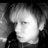

Sad


In [23]:
sample_number = 90

import scipy.misc
from IPython.display import display

array = np.mat(train3.Pixels[sample_number]).reshape(48,48)
image = scipy.misc.toimage(array)
display(image)
print(emotion_label[train3.Emotion[sample_number]])


In [24]:
#from keras.preprocessing.image import ImageDataGenerator
#datagen = ImageDataGenerator(zca_whitening=True)

In [121]:
X_train = np.array(list(map(str.split, train_set.Pixels)), np.float32)
X_validation = np.array(list(map(str.split, validation_set.Pixels)), np.float32)
X_test = np.array(list(map(str.split, test_set.Pixels)), np.float32)

num_train = X_train.shape[0]
num_validation = X_validation.shape[0]
num_test = X_test.shape[0]

X_train = X_train.reshape(num_train, width, height, depth)
X_validation = X_validation.reshape(num_test, width, height, depth)
X_test = X_test.reshape(num_test, width, height, depth)

print('Training: ',X_train.shape)
print('Validation: ',X_validation.shape)
print('Test: ',X_test.shape)


Training:  (28709, 48, 48, 1)
Validation:  (3589, 48, 48, 1)
Test:  (3589, 48, 48, 1)


In [122]:
from keras.utils import np_utils

y_train = train_set.Emotion
y_train = np_utils.to_categorical(y_train, num_classes)

y_validation = validation_set.Emotion
y_validation = np_utils.to_categorical(y_validation, num_classes)

y_test = test_set.Emotion
y_test = np_utils.to_categorical(y_test, num_classes)

print('Training: ',y_train.shape)
print('Validation: ',y_validation.shape)
print('Test: ',y_test.shape)


Training:  (28709, 7)
Validation:  (3589, 7)
Test:  (3589, 7)


In [124]:
from keras.models import Sequential

In [125]:
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D


In [154]:
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from keras.models import Sequential

model = Sequential()

model.add(Convolution2D(64, (3, 1), padding='same', input_shape=(48,48,1)))
model.add(Convolution2D(64, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 1), padding='same'))
model.add(Convolution2D(128, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(256, (3, 1), padding='same'))
model.add(Convolution2D(256, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(512, (3, 1), padding='same'))
model.add(Convolution2D(512, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7))
model.add(Activation('softmax'))

In [155]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 48, 48, 64)        12352     
_________________________________________________________________
batch_normalization_17 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 24, 24, 128)       24704     
__________

In [156]:
from keras.preprocessing.image import ImageDataGenerator 

datagen = ImageDataGenerator(featurewise_center=False,samplewise_center=False,featurewise_std_normalization=False,samplewise_std_normalization=False,zca_whitening=False,rotation_range=0,  
width_shift_range=0.0,height_shift_range=0.0,horizontal_flip=True,vertical_flip=False)
datagen.fit(X_train)
datagen.fit(X_validation)


In [157]:
batch_size = 32
num_epochs = 25

In [158]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

filepath='Model.{epoch:02d}-{val_acc:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

from keras import backend as K

def fbeta(y_true, y_pred, threshold_shift=0):
    beta = 1

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))

In [159]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[fbeta, 'acc'])

In [160]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size)
validation_flow = datagen.flow(X_validation, y_validation)

In [161]:
history = model.fit_generator(train_flow,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=num_epochs, 
                    verbose=1, 
                    validation_data=validation_flow, 
                    validation_steps=len(X_validation) / batch_size,
                    callbacks=[checkpointer, reduce_lr, checkpointer])

Epoch 1/25
583/897 [==================>...........] - ETA: 1:15 - loss: 1.7836 - fbeta: 0.1048 - acc: 0.3030

KeyboardInterrupt: 